In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = {

'latitude': [34.0522, 34.0522, 36.7783, 40.7128, 40.7128, 45.4215, 45.4215, -33.8688, -33.8688, 51.5074, 51.5074],

'longitude': [-118.2437, -118.2437, -119.4179, -74.0060, -74.0060, -75.6972, -75.6972, 151.2093, 151.2093, -0.1278, -0.1278],

'date': ['2023-06-15', '2023-06-16', '2023-07-01', '2023-06-15', '2023-07-01', '2023-06-15', '2023-07-01', '2023-06-15', '2023-07-01', '2023-06-15', '2023-07-01'],

'temperature': [30.2, 31.0, 32.5, 29.0, 28.4, 22.1, 24.5, 25.0, 26.3, 20.3, 22.0],

'region': ['California', 'California', 'California', 'New York', 'New York', 'Ontario', 'Ontario', 'Sydney', 'Sydney', 'London', 'London']}

df=pd.DataFrame(data)

print(df)
print()
print(df.info())
print()
print(df.describe())

    latitude  longitude        date  temperature      region
0    34.0522  -118.2437  2023-06-15         30.2  California
1    34.0522  -118.2437  2023-06-16         31.0  California
2    36.7783  -119.4179  2023-07-01         32.5  California
3    40.7128   -74.0060  2023-06-15         29.0    New York
4    40.7128   -74.0060  2023-07-01         28.4    New York
5    45.4215   -75.6972  2023-06-15         22.1     Ontario
6    45.4215   -75.6972  2023-07-01         24.5     Ontario
7   -33.8688   151.2093  2023-06-15         25.0      Sydney
8   -33.8688   151.2093  2023-07-01         26.3      Sydney
9    51.5074    -0.1278  2023-06-15         20.3      London
10   51.5074    -0.1278  2023-07-01         22.0      London

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   latitude     11 non-null     float64
 1   longitude    11 non-null     float

In [7]:
df["date"]= pd.to_datetime(df["date"])

Region to analyze fires in:  California


Found    latitude  longitude       date  temperature      region
0   34.0522  -118.2437 2023-06-15         30.2  California
1   34.0522  -118.2437 2023-06-16         31.0  California
2   36.7783  -119.4179 2023-07-01         32.5  California records for California


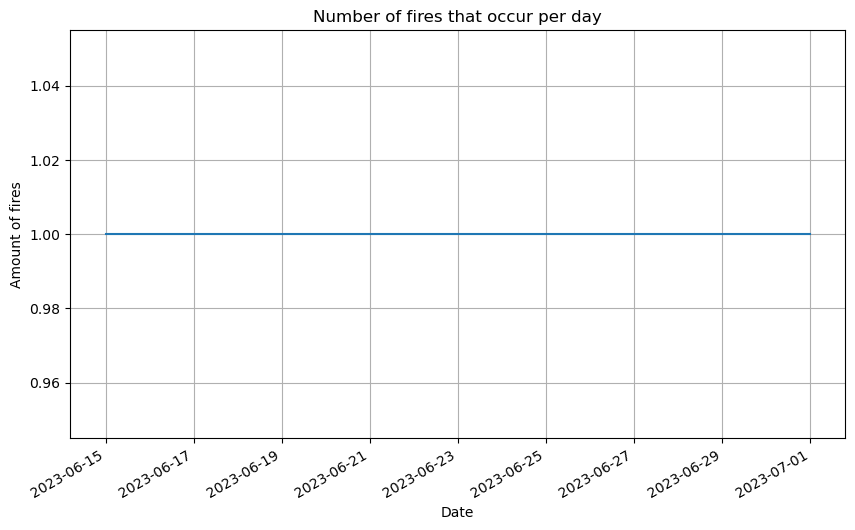

In [15]:
def search_by_region(region):
    region_data=df[df["region"].str.contains(region, case=False, na=False)]
    return region_data

def fire_trend_plot(region_data):
    fires_per_day = region_data.groupby("date").size()
    plt.figure(figsize=(10,6))
    fires_per_day.plot()
    plt.title("Number of fires that occur per day")
    plt.xlabel("Date")
    plt.ylabel("Amount of fires")
    plt.grid(True)
    plt.show()

def plot_temp_trend(region_data):
    plt.figure(figsize=(10,6))
    plt.plot(region_data["date"], region_data["Temperature"], label="Temperature")
    plt.title("Temperature trends during fires")
    plt.xlabel("Date")
    plt.ylabel("Temperature (C)")
    plt.grid(True)
    plt.legend()
    plt.show()

def fire_analysis_tool():
    region=input("Region to analyze fires in: ")
    region_data = search_by_region(region)

    if region_data.empty:
        print("No fires found for", region)
    else:
        print(f"Found {region_data} records for {region}")

    fire_trend_plot(region_data)

fire_analysis_tool()